# Import libraries

In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

# Read the city png file

In [2]:
city_dir = "C:/Users/User/Desktop/MBSE/"

In [3]:
im_frame = Image.open(city_dir + 'city.png')
map_1d = np.array(im_frame.getdata())

## Convert 1d map grid to 2d

In [4]:
map_1d

array([[121,  85,  72, 255],
       [121,  85,  72, 255],
       [121,  85,  72, 255],
       ...,
       [121,  85,  72, 255],
       [121,  85,  72, 255],
       [121,  85,  72, 255]])

In [5]:
map_1d = np.delete(map_1d, -1, axis=1)

In [6]:
map_1d

array([[121,  85,  72],
       [121,  85,  72],
       [121,  85,  72],
       ...,
       [121,  85,  72],
       [121,  85,  72],
       [121,  85,  72]])

In [7]:
map_2d = np.reshape(map_1d, (60, 60, 1, 3))

In [8]:
np.shape(map_2d)

(60, 60, 1, 3)

In [9]:
rows = np.shape(map_2d)[0]
cols = np.shape(map_2d)[1]
height = 1
colors = np.shape(map_2d)[2]

In [10]:
map_2d[0,0,0,:]

array([121,  85,  72])

In [11]:
map_2d[2,2,0,:]

array([ 76, 175,  80])

In [12]:
map_2d[2,3,0,:]

array([  3, 169, 244])

In [13]:
map_2d[30,30,0,:]

array([255, 255, 255])

## initialize color variables as their corresponding rgb values

In [14]:
brown = [121, 85, 72]
green = [76, 175, 80]
blue = [3, 169, 244]
white = [255,255,255]

## Convert rgb values to chars : 
    road = 't'
    trees = 'g'
    building = 'b'
    nothing = 'w'

In [15]:
map_2d_list = [[[  [] for _ in range(height)] for _ in range(cols)] for _ in range(rows)]

In [16]:
for i in range(rows):
    for j in range(cols):
        if map_2d[i,j,0,:].tolist() == brown:
            map_2d_list[i][j][0] = 't'
        elif map_2d[i,j,0,:].tolist() == green:
            map_2d_list[i][j][0] = 'g'
        elif map_2d[i,j,0,:].tolist() == blue:
            map_2d_list[i][j][0] = 'b'
        elif map_2d[i,j,0,:].tolist() == white:
            map_2d_list[i][j][0] = 'w'

In [17]:
np.shape(map_2d_list)

(60, 60, 1)

## Convert 2d map grid to 3d

In [18]:
# initialize empty 3d list
map_3d = [[[  [] for _ in range(height*3)] for _ in range(cols*3)] for _ in range(rows*3)]

In [19]:
np.shape(map_3d)

(180, 180, 3, 0)

In [20]:
# split each cell to 3
for i in range(rows):
    for j in range(cols):
        for k in range(height):
            for t1 in range(3):
                for t2 in range(3):
                    for t3 in range(3):
                        map_3d[i*3 + t1][j*3 + t2][k*3 + t3] = map_2d_list[i][j][k]

In [21]:
# set new rows, col, height numbers
rows = 180
cols = 180
height = 3

In [22]:
for i in range(rows):
    for j in range(cols):
        for k in [1,2]:
            if map_3d[i][j][k] == 't':
                map_3d[i][j][k] = 'w'

In [23]:
np.shape(map_3d)

(180, 180, 3)

In [24]:
map_3d

[[['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w', 'w'],
  ['t', 'w',

# Visualize 3d grid

In [25]:
x1 = []
x2 = []
x3 = []
x4 = []
y1 = []
y2 = []
y3 = []
y4 = []
z1 = []
z2 = []
z3 = []
z4 = []

for i in range(rows):
    for j in range(cols):
        for k in range(height):
            if map_3d[i][j][k]=='t':
                x1.append(i)
                y1.append(j)
                z1.append(k)
            elif map_3d[i][j][k]=='g':
                x2.append(i)
                y2.append(j)
                z2.append(k)
            elif map_3d[i][j][k]=='b':
                x3.append(i)
                y3.append(j)
                z3.append(k)
            elif map_3d[i][j][k]=='w':
                x4.append(i)
                y4.append(j)
                z4.append(k)

<IPython.core.display.Javascript object>


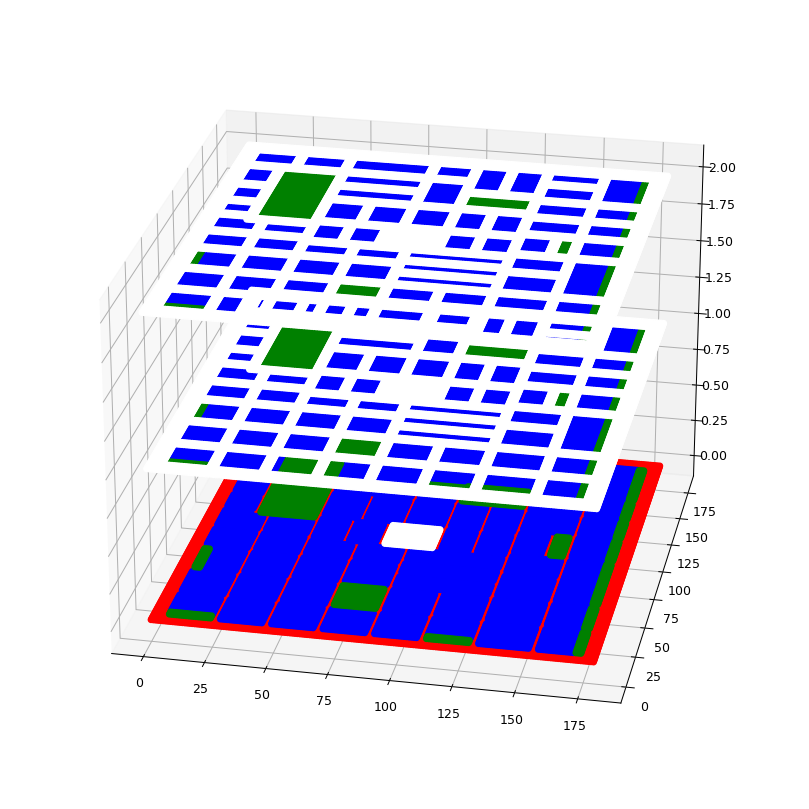

In [27]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, z1, c='red', alpha=1)
ax.scatter(x2, y2, z2, c='green', alpha=1)
ax.scatter(x3, y3, z3, c='blue', alpha=1)
ax.scatter(x4, y4, z4, c='white', alpha=1)
plt.show()

# Initialize the objects

In [47]:
# class for the entire grid
class grid():
    def __init__(self, city_model):
        self.rows = np.shape(city_model)[0]
        self.cols = np.shape(city_model)[1]
        self.height = np.shape(city_model)[2]
        
        # initialize all the grid cells
        self.grid3d = []
        for i in range(0,self.rows):
            self.grid3d.append([])
            for j in range(0,self.cols):
                self.grid3d[i].append([])
                for k in range(0,self.height):
                    if city_model[i][j][k] == 't':
                        if i in [0, 1, self.rows-2, self.rows-1] or j in [0, 1, self.cols-2, self.cols-1]:
                            road_type = "high road"
                        else:
                            road_type = "inner road"
                        item = road([i,j,k], road_type)
                    elif city_model[i][j][k] == 'g':
                        item = tree([i,j,k])
                    elif city_model[i][j][k] == 'b':
                        item = building([i,j,k])
                    elif city_model[i][j][k] == 'w':
                        item = empty([i,j,k])
                        
                    self.grid3d[i][j].append(item)

In [48]:
# class that contains all the grid cells
class grid_cell():
    def __init__(self, cell):
        self.x = cell[0] # x coordinate
        self.y = cell[1] # y coordinate
        self.z = cell[2] # z coordinate
        
        # boolean flags
        self.sensor_flag = False
        self.co2 = None

In [49]:
# car objects
class vehicle(grid_cell):
    def __init__(self, cell, fuel_type, speed):
        super().__init__(cell)
        self.fuel_type = fuel_type
        self.speed = speed
        
        self.co2 = 5;

In [50]:
# building objects
class building(grid_cell):
    def __init__(self, cell):
        pass

In [51]:
# road object
class road(grid_cell):
    def __init__(self, cell, road_type):
        super().__init__(cell)
        if road_type == "high road":
            self.speed_limit = 90
        elif road_type == "inner road":
            self.speed_limit = 40

In [52]:
# tree object
class tree(grid_cell):
    def __init__(self, cell):
        super().__init__(cell)
        pass

In [53]:
# empty object
class empty(grid_cell):
    def __init__(self, cell):
        super().__init__(cell)
        pass

In [54]:
model = grid(map_3d)

In [56]:
print(np.shape(model.grid3d))

(180, 180, 3)


In [58]:
print(model.grid3d[0][0][0].speed_limit)

90


# Simulation functions

In [ ]:
# calculate the CO2
def calculate_co2():
    # calculate car emissions
    co2_sum = 0
    for i in city.rows:
        for j in city.cols:
            for k in city.height:
                if city.grid3d[i][j][k].car_flag:
                    co2_sum += city.grid3d[i][j][k].co2

In [ ]:
# apply wind effect
def apply_wind():
    for i in city.rows:
        for j in city.cols:
            for k in city.height:
                if city.grid3d[i][j][k].co2:
                    

In [ ]:
# apply air dispersion dynamics
def apply_co2_dispersion():
    for i in city.rows:
        for j in city.cols:
            for k in city.height:
                if city.grid3d[i][j][k].co2:


# Run the simulation

In [ ]:
simulation_flag = True

# run the simulation
iteration = -1
while (simulation_flag):
    iteration +=1
    print("iteration # ", iteration)
    
    # iterate over the entire grid
    calculate_co2()
    
    # calculate wind effect
    apply_wind()
    
    # apply dispersion
    apply_co2_dispersion()
                